# Car Data 

### Importing Required Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score


In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Reading The Data

In [5]:
df = pd.read_csv("../Data/car_data.csv")

In [6]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,No
1,681,Male,40,43500,No
2,353,Male,49,74000,No
3,895,Male,40,107500,Yes
4,661,Male,25,79000,No


In [7]:
df.shape

(1000, 5)

## Exploratory Data Analysis

In [8]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [10]:
df.describe()

,User ID,Age,AnnualSalary
count,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000
std,288.819436,10.707073,34488.341867
min,1.000000,18.000000,15000.000000
25%,250.750000,32.000000,46375.000000
50%,500.500000,40.000000,72000.000000
75%,750.250000,48.000000,90000.000000
max,1000.000000,63.000000,152500.000000


### Dist Plot


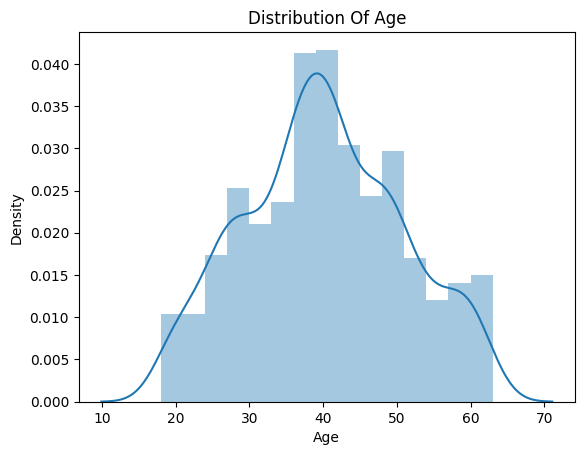

In [11]:
sns.distplot(df['Age']).set(title="Distribution Of Age");

### Distplot

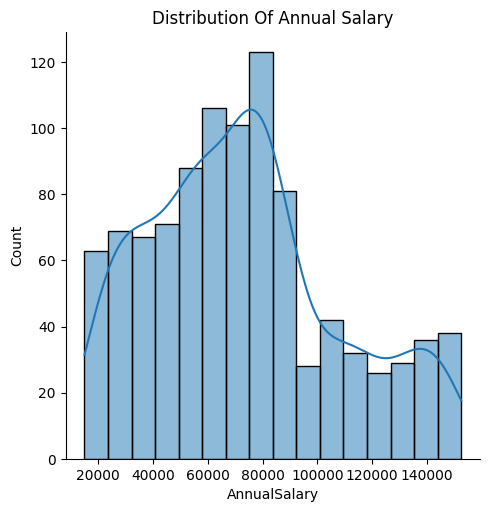

In [12]:
sns.displot(df, x='AnnualSalary', kde=True).set(title="Distribution Of Annual Salary");

### Scatter Plot
In Scatter plot, We can see there is a change in salary with age. As, trend shows more salary tends to more chance of purchasing car

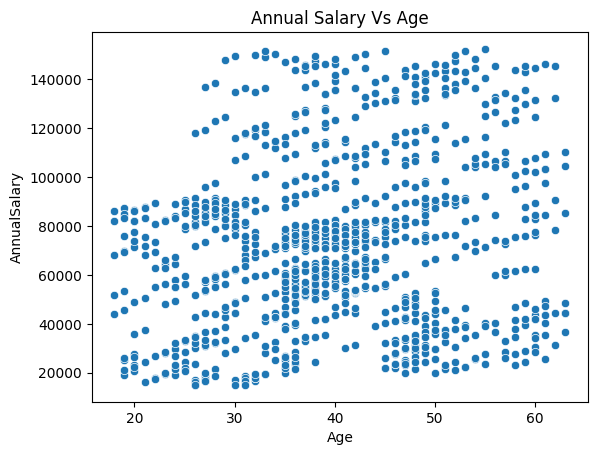

In [13]:
sns.scatterplot(df, x='Age', y='AnnualSalary').set(title="Annual Salary Vs Age");

### Heatmap
In The Below heatmap, We Can see the age is quite more correlated to purchasing and secondary is Annual Salary

In [14]:
p_df = df.copy()
p_df["Purchased"] = p_df["Purchased"].map({"Yes": 1, "No": 0})

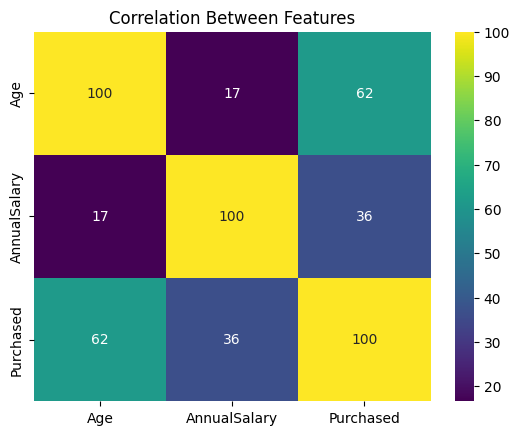

In [15]:
sns.heatmap(p_df.drop('User ID', axis=1).corr(numeric_only=True) * 100, annot=True, fmt='.0f', cmap='viridis').set(title="Correlation Between Features");

### Bar Graph
In Bar Graph, It Shows us the difference in data or Imbalanced Dataset

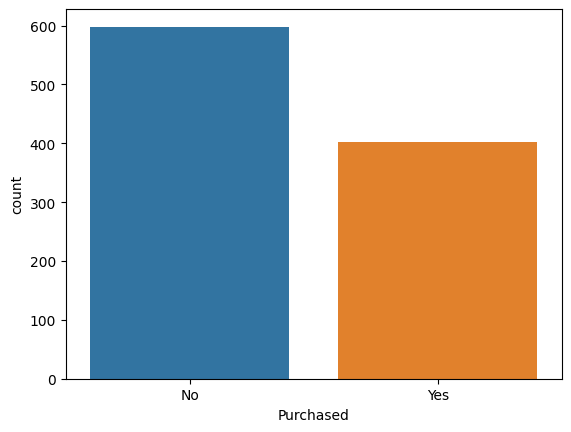

In [16]:
sns.countplot(df, x='Purchased', hue='Purchased');

[Text(0.5, 1.0, 'Purchase Distribution Through Age & Gender')]

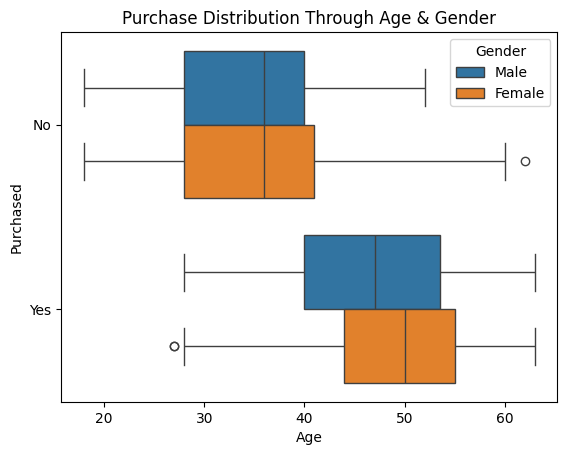

In [17]:
sns.boxplot(df, x="Age", y="Purchased", hue="Gender").set(title="Purchase Distribution Through Age & Gender")

### Splitting The Dataset

In [18]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Engineering

In [20]:
label_encoder = LabelEncoder()

In [21]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

#### Function Based Implementation

In [22]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [23]:
y_test = le.transform(y_test)

#### Column Transformer

In [24]:
encoder_transformer = ColumnTransformer([('One Hot Encoder', one_hot_encoder, ['Gender'])], remainder='passthrough')

#### Scaling

In [25]:
scaler_transformer = ColumnTransformer(
    [('Scaler', StandardScaler(), slice(0, 2))]
)

#### Model 

In [26]:
model = LogisticRegression()

#### Pipeline

In [27]:
pipe = Pipeline(
    [("Encoder", encoder_transformer),
    ("Scaler", scaler_transformer),
    ("model", model)]
)

In [28]:
pipe

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('Scaler',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 2, None))])),
                ('model', LogisticRegression())])

In [29]:
pipe_dtree = Pipeline(
    [("Encoder", encoder_transformer),
    ("Scaler", scaler_transformer),
    ("model", DecisionTreeClassifier())]
)

In [30]:
pipe_rf = Pipeline(
    [("Encoder", encoder_transformer),
    ("Scaler", scaler_transformer),
    ("model", RandomForestClassifier())]
)

In [31]:
pipe_xgb = Pipeline(
    [("Encoder", encoder_transformer),
    ("Scaler", scaler_transformer),
    ("model", XGBClassifier())]
)

In [32]:
X_train.head()

,Gender,Age,AnnualSalary
541,Male,50,29500
440,Female,47,107000
482,Female,42,75000
422,Female,28,59500
778,Female,48,47500


### Training The Model

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('Scaler',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 2, None))])),
                ('model', LogisticRegression())])

In [34]:
pipe_dtree.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('Scaler',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 2, None))])),
                ('model', DecisionTreeClassifier())])

In [35]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('Scaler',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 2, None))])),
                ('model', RandomForestClassifier())])

In [36]:
pipe_xgb.fit(X=X_train, y=y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('Scaler',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 2, None))])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsamp...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Testing The Model

In [37]:
logreg = {"Model": "Logistic Regresion","Test Score" :pipe.score(X_test, y_test)* 100, "Train Score" : pipe.score(X_train, y_train)* 100}

In [38]:
dtree = {"Model":"Decision Tree Classifier","Test Score":pipe_dtree.score(X_test, y_test)* 100, "Train Score":pipe_dtree.score(X_train, y_train)* 100}

In [39]:
rforest = {"Model": "Random Forest Classifier","Test Score": pipe_rf.score(X_test, y_test)* 100, "Train Score": pipe_rf.score(X_train, y_train)* 100}

In [40]:
xgb = {"Model": "XGBoost Classifier","Test Score":pipe_xgb.score(X_test, y_test)* 100, "Train Score":pipe_xgb.score(X_train, y_train)* 100}

In [41]:
df_score = pd.DataFrame(columns=["Model","Test Score", "Train Score"])
df_score.loc[len(df_score)] = logreg
df_score.loc[len(df_score)] = dtree
df_score.loc[len(df_score)] = rforest
df_score.loc[len(df_score)] = xgb
df_score.to_csv("..\Data\model_scores.csv", index=False)

### Hyperparameter Tuning

In [42]:
params_grid = {
    'model__C': np.logspace(-4, 4, 20),
    'model__solver': ['lbfgs', 'newton-cg', 'saga'],
    'model__max_iter': [100, 100, 2500, 5000]
}

In [43]:
tuned_model = GridSearchCV(pipe, param_grid=params_grid)

In [44]:
tuned_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender'])])),
                                       ('Scaler',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 2, None))])),
                                       ('model', LogisticRegression())]),
             param_grid={'m...2796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'model__max_iter': [100, 100, 2500, 5000],
                         'model__solver': ['lbfgs', 'newton-cg', 'saga']})

## Evaluation

In [45]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       172
           1       0.81      0.74      0.77       128

    accuracy                           0.81       300
   macro avg       0.81      0.80      0.81       300
weighted avg       0.81      0.81      0.81       300



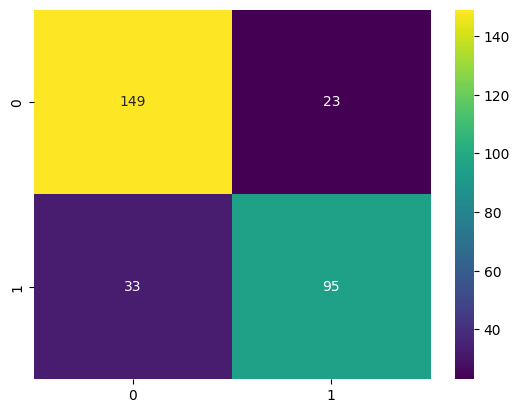

In [46]:
cm1 = confusion_matrix(y_test, pipe.predict(X_test))
sns.heatmap(cm1, annot=True, fmt='0.0f', cmap='viridis');

### ROC Curve

In [47]:
def plot_roc_curve(fpr:np.ndarray , tpr: np.ndarray, roc_auc: np.float64) -> None:
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

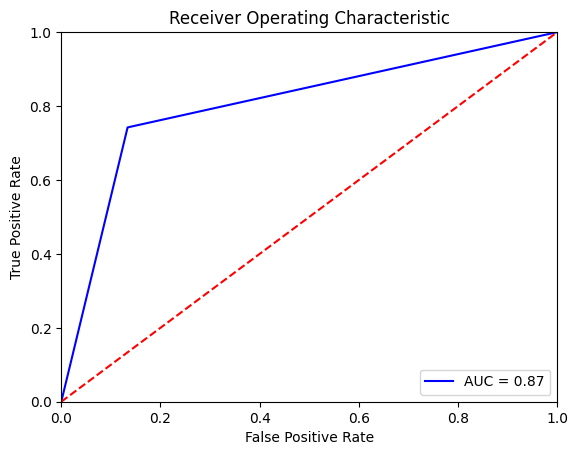

In [48]:
fpr , tpr, threshold = roc_curve(y_test, pipe.predict(X_test))
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[::, 1])
plot_roc_curve(fpr, tpr, auc)

### Log Loss

In [49]:
log_loss(y_test, pipe.predict(X_test))

6.728148632635202